In [1]:
import itertools
import matplotlib.pyplot as plt
from math import sqrt, log
import math
import numpy as np
import random
from datetime import datetime
random.seed(datetime.now())
import pandas as pd
import os
marker = itertools.cycle((',', '+', '.', 'd', '*','x','v','>','<','^','P','|')) 
savedir = "D:\\Uni\\SEMESTERS\\MS\\BDA\\I\\ComplexSystems\\Majority-vote-model\\figs\\"
%matplotlib inline
from scipy.optimize import curve_fit
import scipy
from shapely.geometry import LineString
from scipy import asarray as ar,exp
import statistics
from statistics import mode

In [2]:
def most_common(List):
    return(mode(List))


def gauss(x, a, x0, sigma):
    return a * np.exp(-(x - x0)**2 / (2 * sigma**2))

def find_nearest(array,value):
    idx,val = min(enumerate(array), key=lambda x: abs(x[1]-value))
    return idx

In [3]:
def add_subplot_axes(ax,rect,axisbg='w'):
    fig = plt.gcf()
    box = ax.get_position()
    width = box.width
    height = box.height
    inax_position  = ax.transAxes.transform(rect[0:2])
    transFigure = fig.transFigure.inverted()
    infig_position = transFigure.transform(inax_position)    
    x = infig_position[0]
    y = infig_position[1]
    width *= rect[2]
    height *= rect[3]  # <= Typo was here
    subax = fig.add_axes([x,y,width,height],facecolor=axisbg)
    x_labelsize = subax.get_xticklabels()[0].get_size()
    y_labelsize = subax.get_yticklabels()[0].get_size()
    x_labelsize *= rect[2]**0.5
    y_labelsize *= rect[3]**0.5
    subax.xaxis.set_tick_params(labelsize=10)
    subax.yaxis.set_tick_params(labelsize=10)
    return subax

In [4]:
from __future__ import division 
import numpy as np
import matplotlib.pyplot as plt

def interpolated_intercept(x, y1, y2):
    """Find the intercept of two curves, given by the same x data"""

    def intercept(point1, point2, point3, point4):
        """find the intersection between two lines
        the first line is defined by the line between point1 and point2
        the first line is defined by the line between point3 and point4
        each point is an (x,y) tuple.

        So, for example, you can find the intersection between
        intercept((0,0), (1,1), (0,1), (1,0)) = (0.5, 0.5)

        Returns: the intercept, in (x,y) format
        """    

        def line(p1, p2):
            A = (p1[1] - p2[1])
            B = (p2[0] - p1[0])
            C = (p1[0]*p2[1] - p2[0]*p1[1])
            return A, B, -C

        def intersection(L1, L2):
            D  = L1[0] * L2[1] - L1[1] * L2[0]
            Dx = L1[2] * L2[1] - L1[1] * L2[2]
            Dy = L1[0] * L2[2] - L1[2] * L2[0]

            x = Dx / D
            y = Dy / D
            return x,y

        L1 = line([point1[0],point1[1]], [point2[0],point2[1]])
        L2 = line([point3[0],point3[1]], [point4[0],point4[1]])

        R = intersection(L1, L2)

        return R

    idx = np.argwhere(np.diff(np.sign(y1 - y2)) != 0)
    xc, yc = intercept((x[idx], y1[idx]),((x[idx+1], y1[idx+1])), ((x[idx], y2[idx])), ((x[idx+1], y2[idx+1])))
    return xc,yc

In [5]:
el = ['-1','1']
ls = []
for i in el:
    for j in el:
        for k in el:
            for x in el:
                for y in el:
                    for z in el:
                        #file.write(i+","+j+","+k+","+x+","+y+","+z + "\n")
                        
#file.close()

SyntaxError: unexpected EOF while parsing (<ipython-input-5-2b350881e874>, line 11)

In [6]:
a=0

for i in range (6):
    for j in range(i+1,6):
        for k in range(j+1,6):
            a+=1
            print(i+1,j+1,k, "    ", a)

for elem in set(list(itertools.combinations([1,2,3,4,5,6],3))):
    a+=1
    print(elem,i)
    
    
    
    

1 2 2      1
1 2 3      2
1 2 4      3
1 2 5      4
1 3 3      5
1 3 4      6
1 3 5      7
1 4 4      8
1 4 5      9
1 5 5      10
2 3 3      11
2 3 4      12
2 3 5      13
2 4 4      14
2 4 5      15
2 5 5      16
3 4 4      17
3 4 5      18
3 5 5      19
4 5 5      20
(3, 5, 6) 5
(1, 2, 5) 5
(4, 5, 6) 5
(1, 3, 6) 5
(1, 4, 5) 5
(2, 4, 5) 5
(2, 3, 6) 5
(1, 5, 6) 5
(1, 2, 4) 5
(2, 5, 6) 5
(3, 4, 6) 5
(1, 3, 5) 5
(2, 3, 5) 5
(1, 2, 6) 5
(1, 2, 3) 5
(1, 4, 6) 5
(1, 3, 4) 5
(3, 4, 5) 5
(2, 3, 4) 5
(2, 4, 6) 5


In [7]:
def borders(pstart, pend , pnum, which):
    # which -> 1 for +, 0 for - 
    #print("--------------------borders plotter---------------------------")
    error = 1.0e-9
    p = pstart
    #print("pstart:",pstart)
    pmax = pend
    #print("pend:",pmax)
    pstep = (pmax - p)/pnum
    if pnum <= 1: pstep = 1 
    #print("pnum:",pnum)
    border_up = 0
    border_down = 0
    while p <= pmax:
        border_down = (17-105*p)/(210*(1-p))
        if border_down < 0:
            border_down = 0
        if which:
            # for + 
            border_up = 0.5
        else:
            # for -
            border_up = (1-5*p)/(10*(1-p))
            if border_up < 0:
                border_up = 0
        
        #print(p, " --------- > border_down: ", border_down, "--------- > border_up: ", border_up)
        p+=pstep
    #print("-----------------------------------------------")
    return (border_down, border_up)
borders(0.0,0.99,5, False)
def borders_for_p(qstart, qend , qnum, which):
    # which -> 1 for +, 0 for - 
    #print("--------------------borders plotter---------------------------")
    error = 1.0e-9
    q = qstart
    #print("pstart:",pstart)
    qmax = qend
    #print("pend:",pmax)
    qstep = (qmax - q)/qnum
    if qnum <= 1: qstep = 1 
    #print("pnum:",pnum)
    border_up = 0
    border_down = 0
    while q <= qmax:
        g = 1-2*q
        border_down = (5*g-6)/(5*g)
        if border_down < 0 :
            border_down = 0 + error
        if  border_down > 1:
            border_down = 1 - error
        if which:
            # for + 
            border_up = (15*g-8)/(15*g)
        else:
            # for -
            border_up = 1#1.35*(10*q+1)/(5*(1-2*q))
        if border_up < 0:
            border_up = 0
        
        #print(p, " --------- > border_down: ", border_down, "--------- > border_up: ", border_up)
        q+=qstep
    #print("-----------------------------------------------")
    return (border_down, border_up)

borders_for_p(0.013,0.014,5,False)

(1e-09, 1)

border_plus: (0, 0.3333333333333333)
border_plus: (0, 0.16666666666666663)
border_plus: (0, -0.11111111111111122)


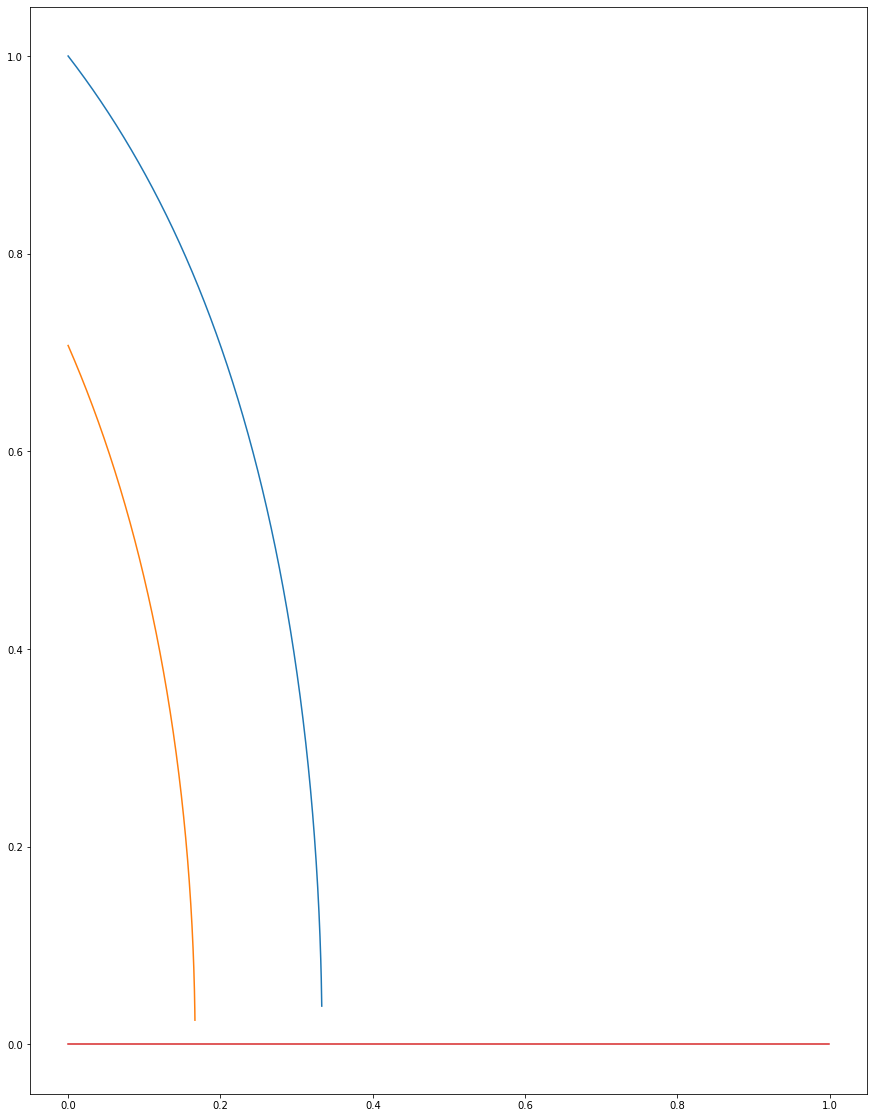

In [8]:




def makeSquareMagnet(pnum, qs,ax):

    #fig, ax = plt.subplots(figsize = (15,20) )
    error = 1.0e-19

    labels = []

    #q = qstart + error
    #qmax = qend - error
    #qstep = (qmax - q)/qnum
    for q in qs:
        all_m_minus = []
        all_m_plus = []
        #print(p)
        border_plus = (0,(6*q-1)/(6*q-3))
        print("border_plus:", border_plus)
        p_plus = border_plus[0]
        p_plus_max = border_plus[1] - error
        pstep_plus = (p_plus_max - p_plus)/pnum
        labels.append(q)
        #labels.append(q)
        ps_plus = []
        # make_plus
        g = 1-2*q
        while p_plus <= p_plus_max:
            p = p_plus
            mq = sqrt((2*p/(1-p)+6*q-1)/(2*q-1))
            ps_plus.append(p)
            all_m_plus.append(mq)
            #print(ps)
            #print(ms)
            p_plus += pstep_plus
        
        all_m = (all_m_plus)
        ps = (ps_plus) 
        ax.plot(ps,all_m)

        
    
    p = 0
    pmax =1
    pstep = 1/pnum
    ps = [i*pstep for i in range(pnum)]
    zeros = [i*0 for i in range(pnum)]
    ax.plot(ps,zeros)

qs = [0.0,0.1,0.2]
fig,axel = plt.subplots(figsize = (15,20) )
makeSquareMagnet(1000,qs,axel)



border_plus: (1e-09, 0.21568627450980388)
border_minus: (1e-09, 1)


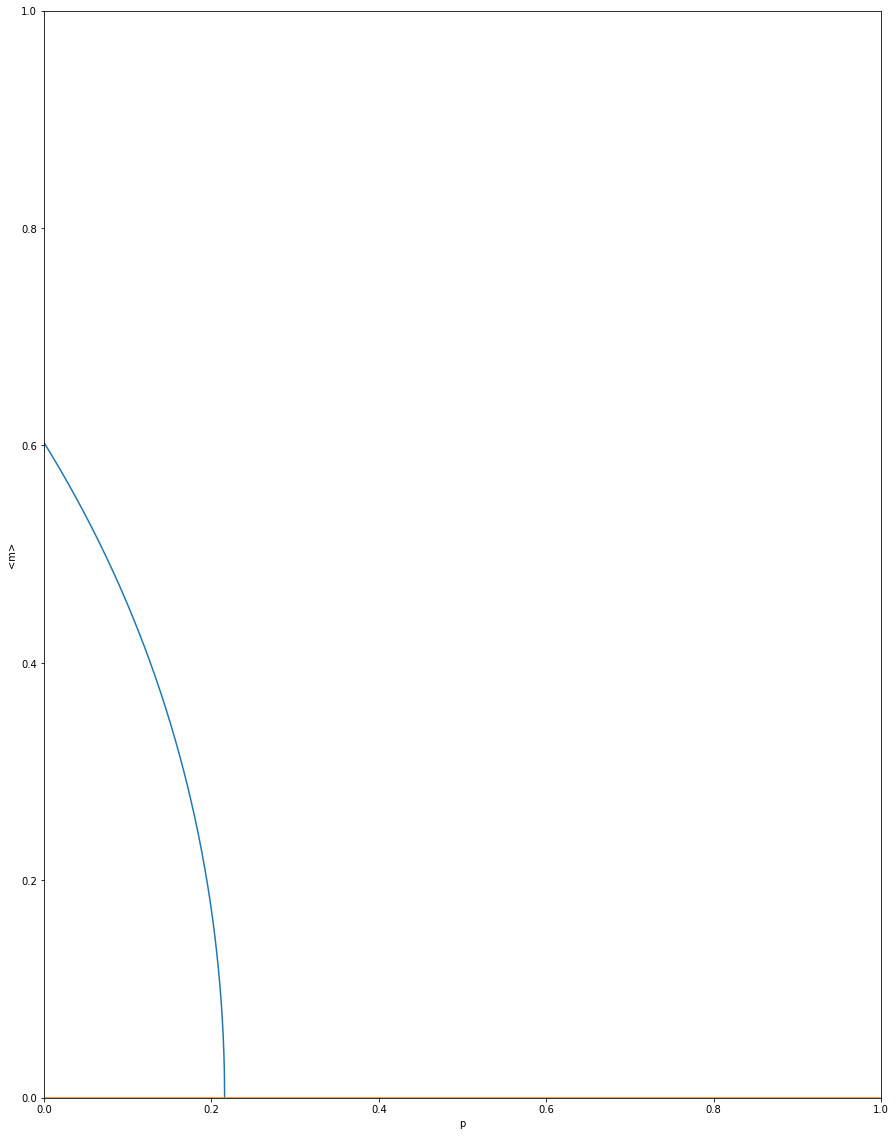

In [9]:
def makeTriangularMagnet_forp(pnum, qs,ax):

    #fig, ax = plt.subplots(figsize = (15,20) )
    error = 1.0e-19

    labels = []

    #q = qstart + error
    #qmax = qend - error
    #qstep = (qmax - q)/qnum
    for q in qs:
        all_m_minus = []
        all_m_plus = []
        #print(p)
        border_plus = borders_for_p(q,q,1,True)
        border_minus = borders_for_p(q,q,1,False)
        print("border_plus:", border_plus)
        print("border_minus:", border_minus)
        p_plus = border_plus[0]
        p_minus = border_minus[0] + error
        p_plus_max = border_plus[1]
        p_minus_max = border_minus[1] - error
        pstep_plus = (p_plus_max - p_plus)/pnum
        pstep_minus = (p_minus_max - p_minus)/pnum
        labels.append(q)
        #labels.append(q)
        ps_plus = []
        ps_minus = []
        # make_plus
        g = 1-2*q
        while p_plus <= p_plus_max:
            p = p_plus
            mq = sqrt((5*g*p+(2*sqrt(-1.0*g*(p-1)*((5*g*p)-(5*g)+6))-(5*g)))/(g*(p-1)))/sqrt(3)
            ps_plus.append(p)
            all_m_plus.append(mq)
            #print(ps)
            #print(ms)
            p_plus += pstep_plus
        # make minus
        while p_minus <= p_minus_max:
            p = p_minus
            mq = (-(5*g*p-(2*sqrt(-1.0*g*(p-1)*((5*g*p)-(5*g)+6))-(5*g)))/(g*(p-1)))/sqrt(3)
            ps_minus.append(p_minus)
            all_m_minus.append(mq)
            #print(ps)
            #print(ms)
            p_minus += pstep_minus
        
        all_m = (all_m_plus)
        ps = (ps_plus) 
        ax.plot(ps,all_m)

        
        #print(all_m_minus)
    p = 0
    pmax =1
    pstep = 1/pnum
    ps = [i*pstep for i in range(pnum)]
    zeros = [i*0 for i in range(pnum)]
    ax.plot(ps,zeros)
    
    
    #ax.set_title("M WTF")
    ax.set_xlim(0,1)
    ax.set_ylim(0,1)
    ax.set_xlabel("p")
    ax.set_ylabel("<m>")
    #ax.legend(["q=" + str(a) for a in labels],loc='best', frameon=False)

    #plt.savefig("./weird.png")
    #plt.show()
fig,axel = plt.subplots(figsize = (15,20) )
qs = [0.16]#,0.045,0.23, 0.25]
makeTriangularMagnet_forp(1000,qs,axel)

-------------- starting simulation for q = 0.1--------------
-------------- finished simulation for q = 0.1--------------


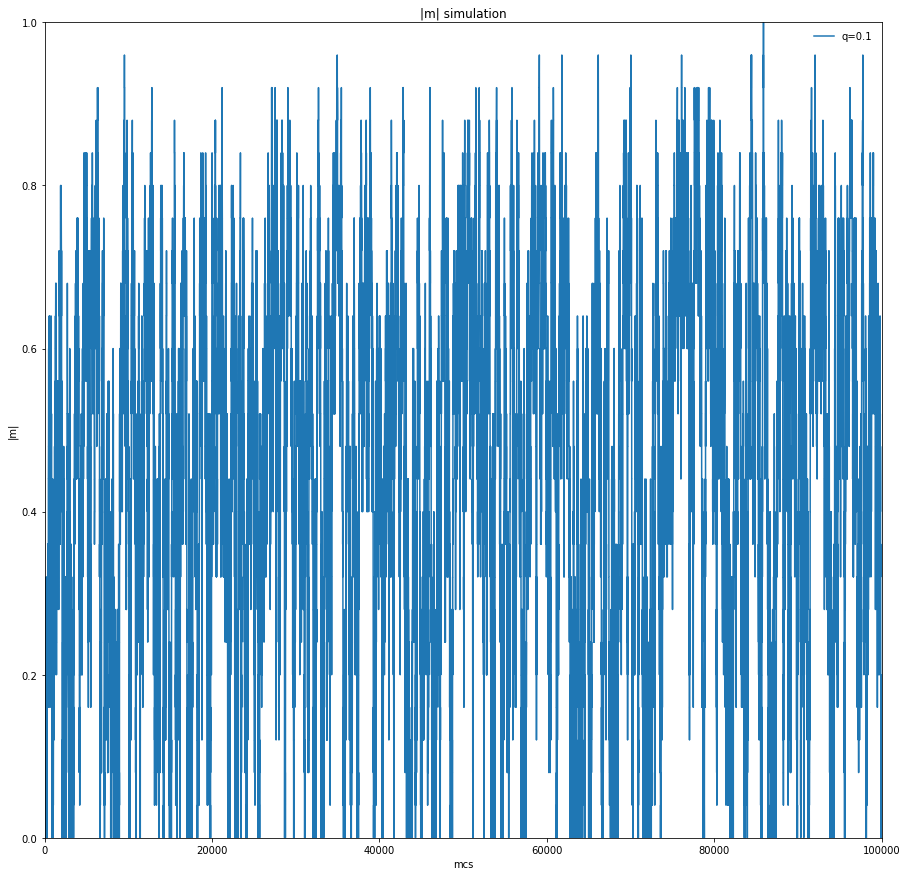

In [10]:
def proba(nei_sum, p, q,spin):
    gamma = 1-2*q
    f = 1
    if nei_sum == 0:
        f = 0
    elif nei_sum < 0:
        f = -1
    else:
        f = 1

    return 0.5*(1-p)*(1-gamma*spin*f)+p/2

def simulationAverages(N, num_nei, mcs, p, qs,savename = "simulation.png"):
    # FULLY CONNECTED
    # N - lattice sites
    # num_nei - neighbors number
    # mcs - Monte Carlo steps
    # av_num - number of averages
    # pstart - starting probability p
    # pmax - ending p
    # pnum - number of ps


    
    fig, ax = plt.subplots(figsize = (15,15))
    labels = []
    
    for q in qs:
        mcs_l = []
        abs_ms= []
        print("-------------- starting simulation for q = " + str(q) + "--------------")
        #av_abs_m = 0
        nums = np.random.choice([-1, 1], size=N, p=[.5, .5])
        m = (np.sum(nums))
        for i in range(mcs):
            spin_num = random.randint(0,N-1) # choose the spin to propose a flip
            spin = nums[spin_num]
            nei_sum = 0
            for j in range(num_nei):
                nei_choice = spin_num
                #print("spin_num = " + str(spin_num))
                while nei_choice == spin_num:
                    nei_choice = random.randint(0,N-1) # choose the spin for nei
                    #print(nei_choice)
                nei_sum += nums[nei_choice]
            #print(nei_sum)
            prob = proba(nei_sum,p,q,spin)
            if random.uniform(0, 1) <= prob:
                nums[spin_num] = -spin
                m -= 2*spin

            mcs_l.append(i)
            abs_ms.append(abs(m/N))
        #------------------------------------------------------------------------------------            
        print("-------------- finished simulation for q = " + str(q) + "--------------")
        #print(ps)
        #print(mcs_l)
        ax.plot(np.array(mcs_l),np.array(abs_ms))
        labels.append(q)
        
        
    ax.set_title("|m| simulation")
    ax.set_xlim(0,mcs)
    ax.set_ylim(0,1)
    ax.set_xlabel("mcs")
    ax.set_ylabel("|m|")
    ax.legend(["q=" + str(a) for a in labels],loc='best', frameon=False)
    
    plt.savefig(savename)
    plt.show()


qs = [0.1]#,0.05]#, 0.1, 0.12,0.2,0.4]
simulationAverages(50,4,100000,0.08, qs,savename = "simulation.png")
            
    
    

also making mean field
border_plus: (0, 0.3333333333333333)
border_plus: (0, 0.3055555555555556)
border_plus: (0, 0.25925925925925924)
border_plus: (0, 0.16666666666666663)
border_plus: (0, -0.6666666666666664)


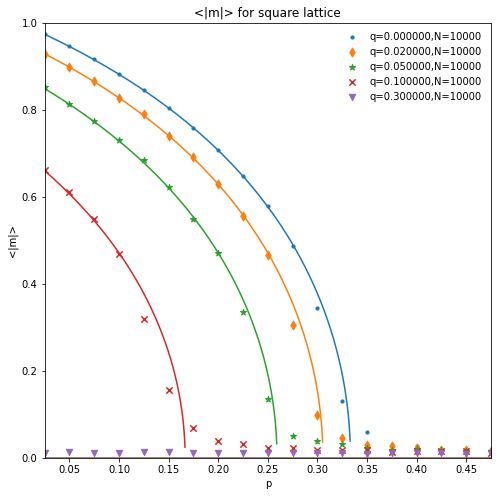

also making mean field
border_plus: (1e-09, 0.4666666666666667)
border_minus: (1e-09, 1)
border_plus: (1e-09, 0.3333333333333333)
border_minus: (1e-09, 1)
border_plus: (1e-09, 0.03614573958344632)
border_minus: (1e-09, 1)
border_plus: (1e-09, 0)
border_minus: (1e-09, 1)


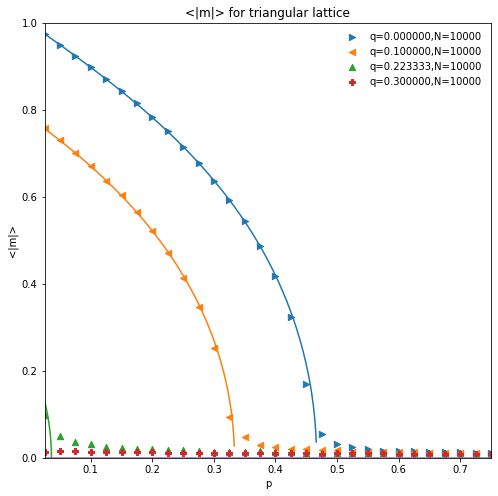

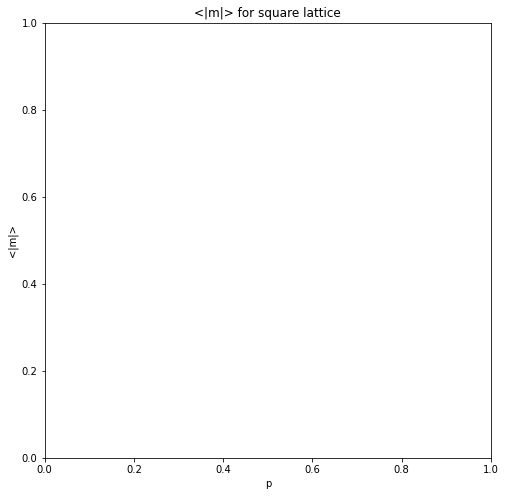

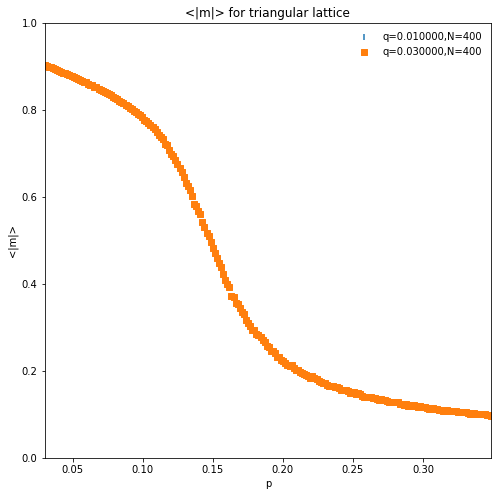

In [37]:
def plotAverages(directory,Ns,savename = "infinite_", typek = "square", plot_mean = True):
    fig, ax = plt.subplots(1,figsize = (8,8))
    labels = []
    qs = []
    xlim = 1
    xmin = 0
    #scatter = None
    handles = []
    for file in os.listdir(directory):
        if file[-4:]==".dat":
            f = pd.read_csv(directory+"\\"+ file, names = ["p",'m','susc','binder'],skiprows = 1, sep ="\t")
            splt = file.split(",")
            q = float(splt[1].split("=")[-1])
            N=int(splt[2].split("=")[-1])
            if q < 1e-7:
                q =0
            #print(f)
            if N in Ns:
                qs.append(q)
                labels.append(splt[1]+","+splt[2])
                markerek = next(marker)
                #handles.append(markerek)
                handles.append(ax.scatter(f['p'], f['m'], marker = markerek,s=40))
                xlim = np.max(f['p'])
                xmin = np.min(f['p'])
            #if q < 0.08:
                #ax[1].plot(f['p'], f['binder'], marker = "+")
            
            #print(f)
    #handles, labels = ax[0].legend
    #print(handles)
    leg =labels
    if plot_mean:
        if typek == "triangular":
            #leg = labels + ["q="+str(a) for a in qs]
            print("also making mean field")
            makeTriangularMagnet_forp(1000,qs,ax)
        elif typek =="square":
            #leg = labels + ["q="+str(a) for a in qs]
            print("also making mean field")
            makeSquareMagnet(1000,qs,ax)
    ax.legend(handles , leg,loc='best', frameon=False)   
    ax.set_title("<|m|> for " + typek + " lattice")
    ax.set_xlim(xmin,xlim)
    ax.set_ylim(0,1)
    ax.set_xlabel("p")
    ax.set_ylabel("<|m|>")
        
    #ax[1].legend(leg,loc='best', frameon=False)   
    #ax[1].set_title("Binder cumulant estimation for " + typek + " lattice")
    #ax[1].set_xlim(0,0.7)
    #ax[1].set_ylim(0,1)
    #ax[1].set_xlabel("p")
    #ax[1].set_ylabel("U")
    
       
    plt.savefig(savedir+savename +typek +".pdf")
    plt.show()
    
    
    
    
    
    
    
Ns = [ 20*20]          
plotAverages("D:\\Uni\\SEMESTERS\\MS\\BDA\\I\\ComplexSystems\\Majority-vote-model\\cpp\\Project1\\Results\\Square\\",[10000], typek= "square")            

plotAverages("D:\\Uni\\SEMESTERS\\MS\\BDA\\I\\ComplexSystems\\Majority-vote-model\\cpp\\Project1\\Results\\Triangular\\",[10000], typek = "triangular") 
plotAverages("D:\\Uni\\SEMESTERS\\MS\\BDA\\I\\ComplexSystems\\Majority-vote-model\\cpp\\Project1\\Results\\Non_infty\\Square\\",savename="non_infty_",Ns=Ns, typek = "square",plot_mean = False)            
plotAverages("D:\\Uni\\SEMESTERS\\MS\\BDA\\I\\ComplexSystems\\Majority-vote-model\\cpp\\Project1\\Results\\Non_infty\\Triangular\\",savename="non_infty_",Ns=Ns, typek = "triangular",plot_mean =False) 

Optimization terminated successfully.
         Current function value: -1.717268
         Iterations: 19
         Function evaluations: 38
suscept max at p = : [0.1404375]
Optimization terminated successfully.
         Current function value: -4.478216
         Iterations: 18
         Function evaluations: 36
suscept max at p = : [0.1078125]
Optimization terminated successfully.
         Current function value: -2.925026
         Iterations: 19
         Function evaluations: 38
suscept max at p = : [0.1165625]
Optimization terminated successfully.
         Current function value: -3.631747
         Iterations: 18
         Function evaluations: 36
suscept max at p = : [0.11]
NS IN RIGHT ORDER [100, 2500, 400, 900]
FOR square LATTICE, GOT Pc= 0.095227525
p_crit(N) [0.141111 0.107714 0.115926 0.11    ]
FOUND nu:  1.2109093927918353 



[1.7209704, 4.4532666, 2.930228, 3.6207263]
SUSCEPTIBILITY CRITICAL EXPONENT (gamma) 2.05878366516774 



MAGNETIZATION CRITICAL EXPONENT (beta) 0.16408917

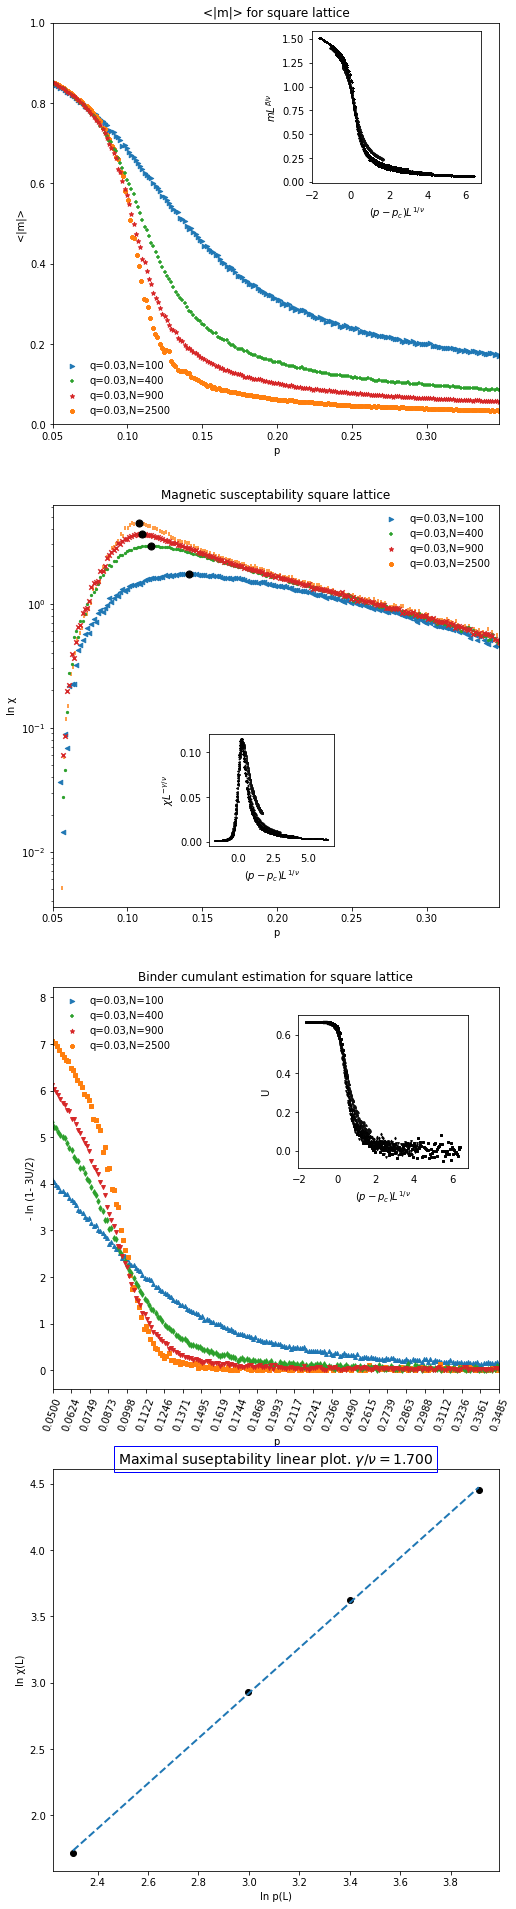

In [149]:
def pc_fit(logN,c,nu):
    return logN*(-1.0/nu) + c
def susc_fit(logN_overnu,d,gamma):
    return logN_overnu*(gamma) +d
def magn_fit(logN_overnu,e,beta):
    return logN_overnu*(-beta) +e


def plotAveragesSizes(directory,Ns,q_wanted, gauss_xmin, gauss_xmax,  savename = "simulation", typek = "square", plot_mean = True):
    fig, ax = plt.subplots(4,figsize = (8,34))
    labels = []
    markers=[]
    qs = []
    xlim = 1
    xmin = 0
    p_crits = []
    Ns_read = []
    pcs =[]
    suscepts = []
    m_crits = []
    binders =[]
    susc_maximas = []
    for file in os.listdir(directory):
        if file[-4:]==".dat":
            f = pd.read_csv(directory+"\\"+ file, names = ["p",'m','susc','binder'],skiprows = 1, sep ="\t")
            f = f.astype(np.float32)
            splt = file.split(",")
            q = float(splt[1].split("=")[-1])
            N=int(splt[2].split("=")[-1])
            L = sqrt(N)
            if q < 1e-7:
                q =0
            #print(f)
            if N in Ns and q == q_wanted:
               # print(f['binder'])
                qs.append(q)
                labels.append("q="+str(q)+","+splt[2])
                markerki =[next(marker),next(marker),next(marker)]
                ax[0].scatter(f['p'], f['m'], marker = markerki[0],s=20, label ="q="+str(q)+","+splt[2] )
                ax[1].scatter(f['p'], np.log(f['susc']), marker = markerki[1],s=20, label = "q="+str(q)+","+splt[2])
                ax[2].scatter(f['p'], -np.log(1-3*np.array(abs(f['binder']))/2), marker = markerki[2],s=15, label = "q="+str(q)+","+splt[2])
            
                markers.append(markerki)
                
                # ---------------------
                if not len(f['p'] ) == 0:
                    x = np.array(f['p'])
                    y_susc = (np.array(np.abs(f['susc'])))
                    binders.append([x,np.array(f['binder'])])
                    suscepts.append([x, y_susc])
                    xlim = np.max(x)
                    xmin = np.min(x)
                    # fit gaussian 

                    ind = np.argmax(np.log(f['susc']))
                    f_tmp = f[f['p']<=f['p'][ind] + gauss_xmax].dropna()
                    f_tmp = f_tmp[f_tmp>=f['p'][ind] - gauss_xmin].dropna()
                    x_gauss = np.array(f_tmp['p'])
                    n = len(x_gauss)
                    y_gauss = np.log(np.array(f_tmp['susc']))
                    #print(x_gauss)
                    #print(y_gauss)
                    mean = sum(x_gauss*(y_gauss))/sum(y_gauss)                   #note this correction
                    sigma = math.sqrt(sum((y_gauss)*(x_gauss-mean)**2)/sum(y_gauss))        #note this correction
                    popt,pcov = curve_fit(gauss,x_gauss,y_gauss, p0=[max(y_gauss), mean, sigma])
                    max_x = scipy.optimize.fmin(lambda x: -gauss(x,*popt), 0)
                    print("suscept max at p = :", max_x)
                    
                    ind = find_nearest(x,max_x[0])# ((np.max(f['m']) + np.min(f['m']))/2))
                    #ax[1].scatter(max_x, gauss(max_x,*popt))
                    susc_maximas.append(log(f['susc'][ind]))#gauss(max_x[0],*popt))
                    # --- consider m as the point between max and min

                    m_crits.append(f['m'][ind])#(np.max(f['m']) + np.min(f['m']))/2)

                    
                    pcs.append((N,max_x[0], np.log(y_susc[ind])))
                    Ns_read.append(N)
                    p_crits.append(x[ind])
                    

                    
                    
                #print(pcs)
    # -------------- find critical points from binder cumulants intersection -------------
    #print(p_crits)
    binder_pcs =[]
    for elem in (itertools.combinations(binders,2)):
        if not elem[0][1].size * elem[1][1].size == 0:
            f = elem[0][1]
            g = elem[1][1]
            zeros = [0*i for i in range(abs(len(f)-len(g)))]
            if len(f) < len(g):
                f = np.array(list(f)+(zeros))
            elif len(g) < len(f):
                g = np.array(list(g)+(zeros))
            x = np.linspace(0, len(f)-1, len(f))
            #x = np.array([i for i in range(len(f)-1)])
            #xc = np.argwhere(np.diff(np.sign(f - g))).flatten()
            xc, yc = interpolated_intercept(x,f,g)
            
            
            #print(xc)
            indx = [elem[1][0][int(a)] for a in xc]
            #indx = np.argwhere(np.diff(np.sign(f - g))).flatten()
            #print(indx)
            #idx = np.argwhere(np.diff(np.sign(elem[0][1] - elem[1][1]))).flatten()
            minpc = 0.093
            maxpc = 0.097
            if typek == "triangular":
                minpc = 0.135
                maxpc =  np.min(p_crits)
            binder_pcs.append([a for a in indx if minpc < a < maxpc ])
            
            
    print("NS IN RIGHT ORDER",Ns_read) 
    #print(binder_pcs)
    # calculate the critical probability from binder cumulants crossing
    #pc = most_common([j for sub in binder_pcs for j in sub])
    pc = np.average(np.array([j for sub in binder_pcs for j in sub]))
    print("FOR " + typek + " LATTICE, GOT Pc=",pc)
    #------------------------------------------------------------------------------------------ FITTING ---------------------------------------------------------------------------------------------------------

    #-----------------------------------------------------pcrit------------------------------------------------------------------------
    p_crits = np.array(p_crits)
    print("p_crit(N)", p_crits)
    popt, pcov = curve_fit(pc_fit,  np.log(np.sqrt(np.array(Ns_read))),np.log(p_crits-pc),maxfev = 2000)
    c,nu = popt
    print("FOUND nu: ", nu , "\n\n\n")
    #print(pc_fit(log(100),c,nu))
    
    #-------------------------------------------suscept------------------------------------------------------------------------
    logchi = [a[2] for a in pcs]
    print(logchi)
    popt, pcov = curve_fit(susc_fit,np.log(np.sqrt(np.array(Ns_read)))/nu,(logchi),maxfev = 2000)
    d,gamma = popt
    print("SUSCEPTIBILITY CRITICAL EXPONENT (gamma)", gamma, "\n\n\n")
    #print("test of log(suscept) for L = 10:\n", susc_fit(log(100)/nu,d,gamma),'\n\n\n')
    #-------------------------------------------magnetization------------------------------------------------------------------------
    logm = [log(a) for a in m_crits]
    #print(logchi)
    popt, pcov = curve_fit(magn_fit,np.log(np.sqrt(np.array(Ns_read)))/nu,np.array(logm),maxfev = 2000)
    e,beta = popt
    print("MAGNETIZATION CRITICAL EXPONENT (beta)", beta)
    #print("test of log(magn) for L = 10:\n", magn_fit(log(100)/nu,e,beta),'\n\n\n')
    

    #-------------------------- ADD SMALL SUBPLOTS ------------------------------
    subpos1 = [0.58,0.6,0.38,0.38]
    subpos2 = [0.35,0.15,0.28,0.28]
    subpos3 = [0.55,0.55,0.38,0.38]
    subax1 = add_subplot_axes(ax[0],subpos1)
    subax2 = add_subplot_axes(ax[1],subpos2)
    subax3 = add_subplot_axes(ax[2],subpos3)
    
    
    # plot again with scaled arguments in subaxes
    i = 0
    for file in os.listdir(directory):
        if file[-4:]==".dat":
            f = pd.read_csv(directory+"\\"+ file, names = ["p",'m','susc','binder'],skiprows = 1, sep ="\t")
            splt = file.split(",")
            q = float(splt[1].split("=")[-1])
            N=int(splt[2].split("=")[-1])
            if q < 1e-7:
                q =0
            #print(f)
            if N in Ns and q == q_wanted and not (f).size == 0:
               # print(f['binder'])
                #qs.append(q)
                #labels.append("q="+str(q)+","+splt[2])
                
                L = int(sqrt(N))
                #beta = 1/8
                #gamma = 7/4
                #nu = 1
                #pc = 0.095
                x = (np.array(f['p']) - pc)*(L**(1.0/nu))
                subax1.scatter(x, np.array(f['m'])*(L**(1.0*beta/nu)), marker = markers[i][0],s=3,c=str(5.0/N))
                subax2.scatter(x, (np.array(f['susc']))*(L**(-1.0*gamma/nu)), marker =  markers[i][1],s=3,c=str(5.0/N))
                subax3.scatter(x, (f['binder']), marker =  markers[i][2],s=3,c=str(5.0/N))
                i+=1

    small_xmin = -8.5
    small_xmax = 8.5
    subax1.tick_params(axis = "x", which = "both", bottom = False, top = False)
    subax1.set_xlabel(r'$(p-p_{c})L^{1/ν}$')
    subax1.set_ylabel(r'$mL^{β/ν}$')
    #subax1.set_xlim(small_xmin,small_xmax)
    
    subax2.tick_params(axis = "x", which = "both", bottom = False, top = False)
    subax2.set_xlabel(r'$(p-p_{c})L^{1/ν}$')
    subax2.set_ylabel(r'$ χ L^{-γ/ν}$')
    #subax2.set_yscale("log")
    #subax2.set_xlim(small_xmin,small_xmax)
    
    subax3.tick_params(axis = "x", which = "both", bottom = False, top = False)
    subax3.set_xlabel(r'$(p-p_{c})L^{1/ν}$')
    subax3.set_ylabel("U")
    #subax3.set_xlim(small_xmin,small_xmax)
    # ---------------------------- plots -------------------------------
    #xlim = 0.4
    xmin = 0.05
    leg =labels
    if plot_mean:
        if typek == "triangular":
            #leg = labels + ["q="+str(a) for a in qs]
            print("also making mean field")
            makeTriangularMagnet_forp(1000,qs,ax)
        elif typek =="square":
            #leg = labels + ["q="+str(a) for a in qs]
            print("also making mean field")
            makeSquareMagnet(1000,qs,ax)
            
    handles, labels = ax[0].get_legend_handles_labels()
    # sort both labels and handles by labels
    
    labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: int(t[0].split(",")[1].split("=")[1])))
    #ax[0].legend(handles, labels)        
    
    ax[0].legend(handles,labels,loc='lower left', frameon=False)   
    ax[0].set_title("<|m|> for " + typek + " lattice")
    ax[0].set_xlim(xmin,xlim)
    ax[0].set_ylim(0,1)
    ax[0].set_xlabel("p")
    ax[0].set_ylabel("<|m|>")
        
    ax[1].legend(handles,labels,loc='best', frameon=False)   
    ax[1].set_title("Magnetic susceptability " + typek + " lattice")
    ax[1].set_xlim(xmin,xlim)
    #ax[1].set_ylim(0)
    ax[1].set_xlabel("p")
    ax[1].set_ylabel("ln \u03C7")
    ax[1].scatter(p_crits,susc_maximas, marker = "o", c = "black", s = 50)
    ax[1].set_yscale("log")
    
    ax[2].legend(handles,labels,loc='upper left', frameon=False)   
    ax[2].set_title("Binder cumulant estimation for " + typek + " lattice")
    ax[2].set_xlim(xmin,xlim)
    #ax[2].set_ylim(0,1)
    ax[2].set_xlabel("p")
    ax[2].set_ylabel("- ln (1- 3U/2)")
    ax[2].set_xticks(np.linspace(xmin,xlim, 25))
    ax[2].tick_params(axis="x",rotation=70)
    
    # linear plots
    logL, logchi = zip(*sorted(zip(np.log(np.sqrt(Ns_read)), logchi), key=lambda t: t))
    coef = np.polyfit(logL,logchi,1)
    poly1d_fn = np.poly1d(coef)
    #plt.plot(x,y, 'yo', x, poly1d_fn(x), '--k')
    ax[3].scatter(logL, logchi, marker=  'o', c= "black")   
    ax[3].plot(logL, poly1d_fn(logL), linestyle = '--', linewidth = 2)
    ax[3].set_xlabel("ln p(L)")
    ax[3].set_ylabel("ln \u03C7(L)")
    ax[3].set_title("Maximal suseptability linear plot. " r'$γ/ν =$' + str(coef[0])[0:5],fontsize = 14, bbox=dict(fill=False, edgecolor='blue', linewidth=1))
    plt.savefig(savedir+savename + typek + ".pdf")
    plt.show()    

Ns = [10*10,20*20,30*30,40*40,80*80,100*100,60*60,70*70,50*50]
plotAveragesSizes("D:\\Uni\\SEMESTERS\\MS\\BDA\\I\\ComplexSystems\\Majority-vote-model\\cpp\\Project1\\Results\\Non_infty\\Square\\",Ns,0.03,0.015,0.009,savename= "non_infty_sizes_", typek = "square",plot_mean = False)            
#plotAveragesSizes("D:\\Uni\\SEMESTERS\\MS\\BDA\\I\\ComplexSystems\\Majority-vote-model\\cpp\\Project1\\Results\\Non_infty\\Triangular\\",Ns,0.03,0.012,0.006,savename= "non_infty_sizes_", typek = "triangular",plot_mean =False)     

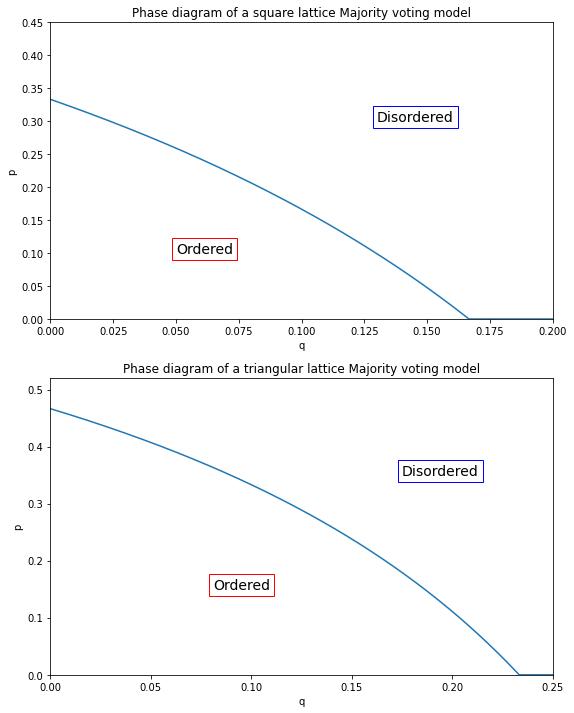

In [108]:
fig,ax = plt.subplots(2,figsize= (9,12))
qnum = 1000
qstart = 0.0
qend = 0.4
qstep = 1.0*(qend-qstart)/qnum
q= qstart
qs=[]
border_sq = []
border_tr = []
while q <= qend:
    g= 1-2*q
    qs.append(q)
    sq = (6*q-1)/(6*q-3)
    if sq<0:
        sq=0
    tr = (15*g-8)/(15*g) #(15*q-8)/(15*q)
    if tr < 0:
        tr = 0
    border_sq.append(sq)
    border_tr.append(tr)
    q+=qstep
#-------------square---------------
ax[0].plot(qs,border_sq)
ax[1].plot(qs,border_tr)
ax[0].set_xlim(0,0.2)
ax[0].set_ylim(0,0.45)
ax[0].set_xlabel("q")
ax[0].set_ylabel("p")
ax[0].set_title("Phase diagram of a square lattice Majority voting model")
ax[0].text(0.13, 0.3, "Disordered",fontsize = 14, bbox=dict(fill=False, edgecolor='blue', linewidth=1))
ax[0].text(0.05, 0.1, "Ordered",fontsize = 14, bbox=dict(fill=False, edgecolor='red', linewidth=1))

#-------------triangular---------------
ax[1].set_xlim(0,0.25)
ax[1].set_ylim(0,0.52)
ax[1].set_xlabel("q")
ax[1].set_ylabel("p")
ax[1].set_title("Phase diagram of a triangular lattice Majority voting model")
ax[1].text(0.175, 0.35, "Disordered",fontsize = 14, bbox=dict(fill=False, edgecolor='blue', linewidth=1))
ax[1].text(0.081, 0.15, "Ordered",fontsize = 14, bbox=dict(fill=False, edgecolor='red', linewidth=1))
plt.savefig(savedir + "criticality.pdf")